In [643]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [644]:
import CalculatedFieldSubroutines as cfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gmids = cfs.list_gmIDs()
topics = cfs.list_topics()

print(topics)

['/apollo/sensor/gnss/best/pose', '/apollo/drive/event', '/apollo/canbus/chassis', '/apollo/perception/traffic/light']


In [645]:
df = cfs.retrieve_gmID_topic(gmids[230],topics[0])
print(df)


       heightMsl                       groupMetadataID  latitudeStdDev  \
0     202.373608  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.014914   
1     202.347633  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.014863   
2     202.383755  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.014890   
3     202.352249  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.015159   
4     202.346440  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.016596   
...          ...                                   ...             ...   
1764  203.228368  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.012189   
1765  203.160989  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.012014   
1766  202.966186  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.012576   
1767  202.732481  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.013443   
1768  202.658620  bcf44e58-eb0d-11ee-b297-3b0ad9d5d6c6        0.013335   

      longitude     solType  extendedSolutionStatus                 time  \
0    -82.127264  NARROW_INT        

In [646]:
df1 = cfs.retrieve_gmID_topic(gmids[210],topics[2])
df2 = cfs.retrieve_gmID_topic(gmids[212],topics[2])

In [647]:
df1 = df1.sort_values("time")

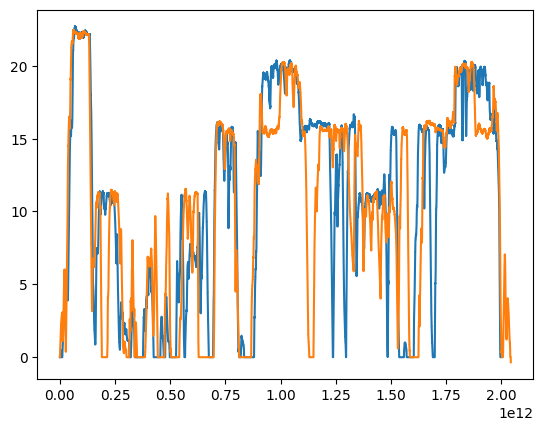

In [648]:
plt.plot(df1["time"] - np.min(df1["time"]), df1["speedMps"])
plt.plot(df2["time"] - np.min(df2["time"]), df2["speedMps"])
plt.show()

In [649]:
cfs.give_route(gmids[210])

'Blue'

In [650]:
cfs.give_route(gmids[211])

'Red'

In [651]:
cfs.give_route(gmids[212])

'Blue'

In [652]:
cfs.give_route(gmids[213])

'Blue'

In [653]:
cfs.give_route(gmids[219])

'Green'

In [654]:
average_speeds = []
for gmid in gmids:
    if cfs.give_route(gmid) == 'Blue':
        average_speed = np.mean(cfs.retrieve_gmID_topic(gmid,topics[2])["speedMps"])
        average_speeds.append(average_speed)
    

In [655]:
blue_route_dfs = []
for gmid in gmids:
    if cfs.give_route(gmid) == 'Blue':
        tempdf = cfs.retrieve_gmID_topic(gmid, topics[2])
        tempdf = tempdf.sort_values("time")
        cfs.NormalizedTime(tempdf)
        tempdf["NormalizedTime"] = np.array(tempdf["NormalizedTime"])/max(tempdf["NormalizedTime"])
        blue_route_dfs.append(tempdf)

In [656]:
avg_speeds = []
for df in blue_route_dfs:
    average_speed = np.mean(df[(df["NormalizedTime"] < 0.04) & (df["NormalizedTime"] > 0.03)]["speedMps"])
    avg_speeds.append(average_speed)

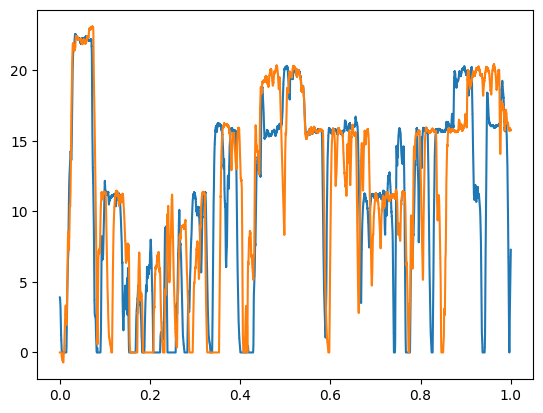

In [657]:
plt.plot(blue_route_dfs[0]["NormalizedTime"], blue_route_dfs[0]["speedMps"])
plt.plot(blue_route_dfs[3]["NormalizedTime"], blue_route_dfs[3]["speedMps"])
plt.show()

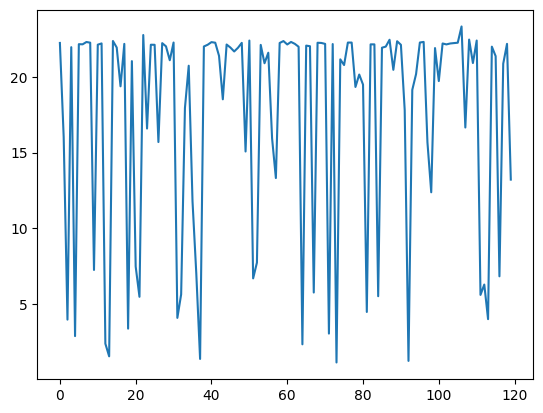

In [658]:
plt.plot(avg_speeds)
plt.show()

In [659]:
reference_blue_route_best_pose_df = cfs.retrieve_gmID_topic( '06cbdbc0-db4d-11ee-a158-97f8443fd730', '/apollo/sensor/gnss/best/pose' )
aPositionBlue = []
for gmid in gmids:
    if cfs.give_route(gmid) == 'Blue':
        temp_chassis_df = cfs.retrieve_gmID_topic(gmid, topics[2])
        temp_pose_df = cfs.retrieve_gmID_topic(gmid, topics[0])
        temp_chassis_df = temp_chassis_df.sort_values("time")
        temp_pose_df = temp_pose_df.sort_values("time")

        cfs.ProgressAlongRoute(temp_pose_df, reference_blue_route_best_pose_df)
        
        cfs.ChassisBestPoseMatchedTime(temp_chassis_df, temp_pose_df)
        tempdf = pd.merge(temp_chassis_df, temp_pose_df, on = "ChassisBestPoseMatchedTime", how = "inner")
        aPositionBlue.append(tempdf)

In [660]:
aPositionBlue[10].head(10000)

,brakePercentage,groupMetadataID_x,drivingMode,speedMps,time_x,throttlePercentage,steeringPercentage,signal.turnSignal,ChassisBestPoseMatchedTime,heightMsl,...,longitude,solType,extendedSolutionStatus,time_y,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,ProgressAlongRoute
0,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,12.64,1700496251731006662,0.0,1.939275,TURN_NONE,1700496252054630529,202.357416,...,-82.127141,NARROW_INT,33,1700496252054630529,0.027943,SOL_COMPUTED,39.329863,0.012007,15,0.006512
1,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,12.71,1700496251763575786,0.0,1.939275,TURN_NONE,1700496252054630529,202.357416,...,-82.127141,NARROW_INT,33,1700496252054630529,0.027943,SOL_COMPUTED,39.329863,0.012007,15,0.006512
2,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,12.78,1700496251796772878,0.0,1.939275,TURN_NONE,1700496252054630529,202.357416,...,-82.127141,NARROW_INT,33,1700496252054630529,0.027943,SOL_COMPUTED,39.329863,0.012007,15,0.006512
3,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,12.85,1700496251828736925,0.0,1.958864,TURN_NONE,1700496252054630529,202.357416,...,-82.127141,NARROW_INT,33,1700496252054630529,0.027943,SOL_COMPUTED,39.329863,0.012007,15,0.006512
4,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,12.88,1700496251862826812,0.0,1.958864,TURN_NONE,1700496252054630529,202.357416,...,-82.127141,NARROW_INT,33,1700496252054630529,0.027943,SOL_COMPUTED,39.329863,0.012007,15,0.006512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,7.11,1700496581730777566,0.0,0.577865,TURN_RIGHT,1700496582057805116,218.663384,...,-82.102748,NARROW_INT,33,1700496582057805116,0.230942,SOL_COMPUTED,39.327874,0.139803,7,0.194614
9996,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,7.09,1700496581765401653,0.0,0.577865,TURN_RIGHT,1700496582057805116,218.663384,...,-82.102748,NARROW_INT,33,1700496582057805116,0.230942,SOL_COMPUTED,39.327874,0.139803,7,0.194614
9997,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,7.08,1700496581796046324,0.0,0.597453,TURN_RIGHT,1700496582057805116,218.663384,...,-82.102748,NARROW_INT,33,1700496582057805116,0.230942,SOL_COMPUTED,39.327874,0.139803,7,0.194614
9998,0.0,d4b936f6-eb36-11ee-b297-3b0ad9d5d6c6,COMPLETE_MANUAL,7.05,1700496581830063082,0.0,0.626836,TURN_RIGHT,1700496582057805116,218.663384,...,-82.102748,NARROW_INT,33,1700496582057805116,0.230942,SOL_COMPUTED,39.327874,0.139803,7,0.194614


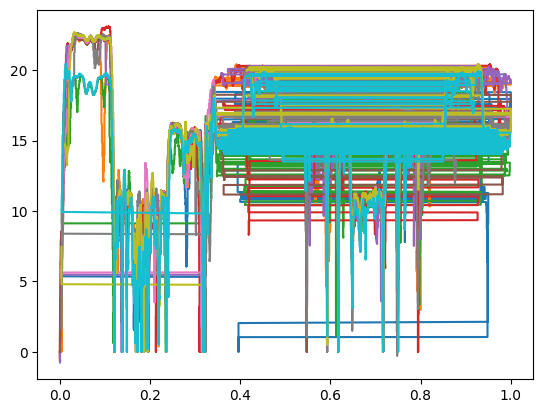

In [661]:
for df in aPositionBlue[:10]:
    plt.plot(df["ProgressAlongRoute"],df["speedMps"])
plt.show()

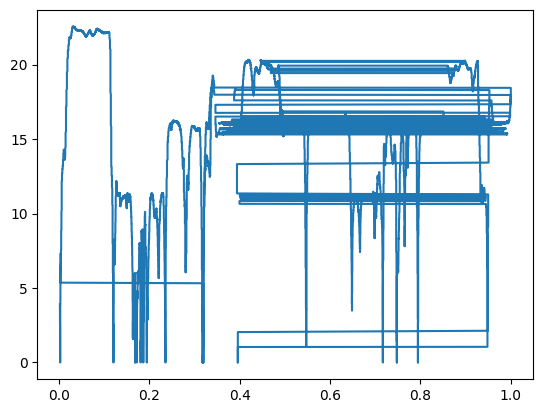

In [662]:
plt.plot(aPositionBlue[0]["ProgressAlongRoute"],aPositionBlue[0]["speedMps"])
plt.show()

In [663]:
reference_red_route_best_pose_df = cfs.retrieve_gmID_topic( 'c0555ef0-f50f-11ee-8afa-cb629b0d53e6', '/apollo/sensor/gnss/best/pose' )
aPositionRed = []
for gmid in gmids:
    if cfs.give_route(gmid) == 'Red':
        temp_chassis_df = cfs.retrieve_gmID_topic(gmid, topics[2])
        temp_pose_df = cfs.retrieve_gmID_topic(gmid, topics[0])
        temp_chassis_df = temp_chassis_df.sort_values("time")
        temp_pose_df = temp_pose_df.sort_values("time")

        cfs.ProgressAlongRoute(temp_pose_df, reference_red_route_best_pose_df)
        
        cfs.ChassisBestPoseMatchedTime(temp_chassis_df, temp_pose_df)
        tempdf = pd.merge(temp_chassis_df, temp_pose_df, on = "ChassisBestPoseMatchedTime", how = "inner")
        aPositionRed.append(tempdf)

In [664]:
aPositionRed[10].head(1000)

,brakePercentage,groupMetadataID_x,drivingMode,speedMps,time_x,throttlePercentage,steeringPercentage,signal.turnSignal,ChassisBestPoseMatchedTime,heightMsl,...,longitude,solType,extendedSolutionStatus,time_y,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,ProgressAlongRoute
0,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_MANUAL,22.187511,1698081075827470224,15.2,0.352030,TURN_NONE,1698081076038400437,203.879439,...,-82.082060,NARROW_INT,33,1698081076038400437,0.016484,SOL_COMPUTED,39.332468,0.007034,17,0.866443
1,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_MANUAL,22.187511,1698081075847379977,15.2,0.352030,TURN_NONE,1698081076038400437,203.879439,...,-82.082060,NARROW_INT,33,1698081076038400437,0.016484,SOL_COMPUTED,39.332468,0.007034,17,0.866443
2,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_MANUAL,22.187511,1698081075867588720,15.2,0.352030,TURN_NONE,1698081076038400437,203.879439,...,-82.082060,NARROW_INT,33,1698081076038400437,0.016484,SOL_COMPUTED,39.332468,0.007034,17,0.866443
3,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_MANUAL,22.217894,1698081075887685746,15.6,0.352030,TURN_NONE,1698081076038400437,203.879439,...,-82.082060,NARROW_INT,33,1698081076038400437,0.016484,SOL_COMPUTED,39.332468,0.007034,17,0.866443
4,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_MANUAL,22.217894,1698081075907392674,15.6,0.352030,TURN_NONE,1698081076038400437,203.879439,...,-82.082060,NARROW_INT,33,1698081076038400437,0.016484,SOL_COMPUTED,39.332468,0.007034,17,0.866443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_AUTO_DRIVE,23.828136,1698081095745554451,21.6,-0.166751,TURN_NONE,1698081096038817176,204.973196,...,-82.081551,NARROW_INT,33,1698081096038817176,0.016412,SOL_COMPUTED,39.336617,0.006953,17,0.878621
996,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_AUTO_DRIVE,23.843328,1698081095767509872,21.2,-0.166751,TURN_NONE,1698081096038817176,204.973196,...,-82.081551,NARROW_INT,33,1698081096038817176,0.016412,SOL_COMPUTED,39.336617,0.006953,17,0.878621
997,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_AUTO_DRIVE,23.843328,1698081095787476112,21.2,-0.166751,TURN_NONE,1698081096038817176,204.973196,...,-82.081551,NARROW_INT,33,1698081096038817176,0.016412,SOL_COMPUTED,39.336617,0.006953,17,0.878621
998,0.0,c338788a-d324-11ee-b437-336917683bb8,COMPLETE_AUTO_DRIVE,23.858519,1698081095807461732,20.8,-0.166751,TURN_NONE,1698081096038817176,204.973196,...,-82.081551,NARROW_INT,33,1698081096038817176,0.016412,SOL_COMPUTED,39.336617,0.006953,17,0.878621


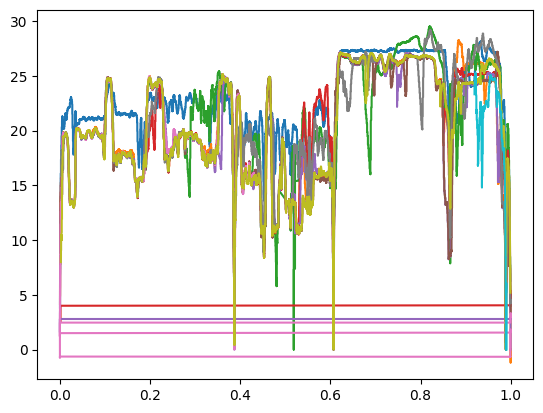

In [665]:
for df in aPositionRed[:10]:
    plt.plot(df["ProgressAlongRoute"],df["speedMps"])
plt.show()

In [666]:
avg_speedsRed = []
for df in aPositionRed:
    average_speed = np.mean(df[(df["ProgressAlongRoute"] < 0.8) & (df["ProgressAlongRoute"] > 0.7)]["speedMps"])
    avg_speedsRed.append(average_speed)

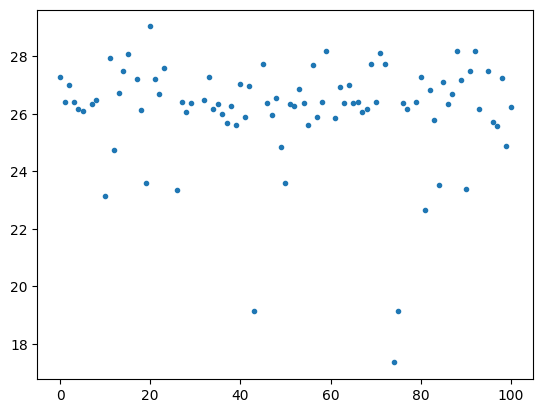

In [667]:
plt.plot(avg_speedsRed, marker = ".", ls = "")
plt.show()

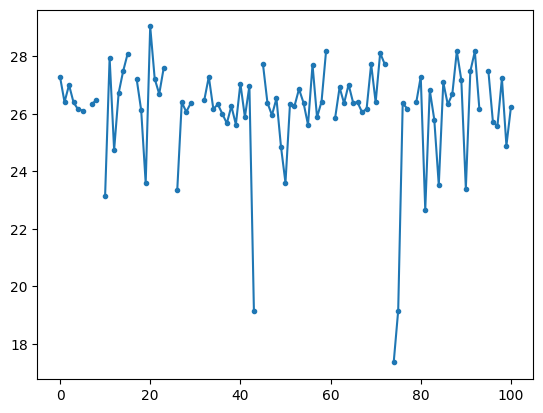

In [668]:
plt.plot(avg_speedsRed, marker = ".")
plt.show()

In [669]:
reference_green_route_best_pose_df = cfs.retrieve_gmID_topic( '5afabc8c-f035-11ee-b966-fb353e7798cd', '/apollo/sensor/gnss/best/pose' )
aPositionGreen = []
for gmid in gmids:
    if cfs.give_route(gmid) == 'Green':
        temp_chassis_df = cfs.retrieve_gmID_topic(gmid, topics[2])
        temp_pose_df = cfs.retrieve_gmID_topic(gmid, topics[0])
        temp_chassis_df = temp_chassis_df.sort_values("time")
        temp_pose_df = temp_pose_df.sort_values("time")

        cfs.ProgressAlongRoute(temp_pose_df, reference_green_route_best_pose_df)
        
        cfs.ChassisBestPoseMatchedTime(temp_chassis_df, temp_pose_df)
        tempdf = pd.merge(temp_chassis_df, temp_pose_df, on = "ChassisBestPoseMatchedTime", how = "inner")
        aPositionGreen.append(tempdf)

In [670]:
aPositionGreen[10].head(10000)

,brakePercentage,groupMetadataID_x,drivingMode,speedMps,time_x,throttlePercentage,steeringPercentage,signal.turnSignal,ChassisBestPoseMatchedTime,heightMsl,...,longitude,solType,extendedSolutionStatus,time_y,heightStdDev,solStatus,latitude,longitudeStdDev,numSatsInSolution,ProgressAlongRoute
0,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_MANUAL,5.96,1704825745668432639,17.4,2.389814,TURN_NONE,1704825746068947377,288.618427,...,-82.438326,NARROW_INT,33,1704825746068947377,0.027783,SOL_COMPUTED,39.326838,0.010477,28,0.004607
1,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_MANUAL,5.98,1704825745702204677,17.4,2.184133,TURN_NONE,1704825746068947377,288.618427,...,-82.438326,NARROW_INT,33,1704825746068947377,0.027783,SOL_COMPUTED,39.326838,0.010477,28,0.004607
2,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_MANUAL,6.00,1704825745734609157,17.4,1.939275,TURN_NONE,1704825746068947377,288.618427,...,-82.438326,NARROW_INT,33,1704825746068947377,0.027783,SOL_COMPUTED,39.326838,0.010477,28,0.004607
3,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_MANUAL,6.01,1704825745766576650,16.5,1.772772,TURN_NONE,1704825746068947377,288.618427,...,-82.438326,NARROW_INT,33,1704825746068947377,0.027783,SOL_COMPUTED,39.326838,0.010477,28,0.004607
4,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_MANUAL,6.04,1704825745799415382,16.5,1.772772,TURN_NONE,1704825746068947377,288.618427,...,-82.438326,NARROW_INT,33,1704825746068947377,0.027783,SOL_COMPUTED,39.326838,0.010477,28,0.004607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_AUTO_DRIVE,8.99,1704826075572822372,12.5,0.352596,TURN_NONE,1704826075094677604,243.732051,...,-82.455594,NARROW_INT,32,1704826075094677604,0.042278,SOL_COMPUTED,39.289785,0.016746,26,0.403697
9996,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_AUTO_DRIVE,8.99,1704826075600344492,12.5,0.352596,TURN_NONE,1704826076094467161,243.912926,...,-82.455622,NARROW_INT,32,1704826076094467161,0.041664,SOL_COMPUTED,39.289707,0.016213,23,0.403697
9997,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_AUTO_DRIVE,8.99,1704826075638369157,12.5,0.352596,TURN_NONE,1704826076094467161,243.912926,...,-82.455622,NARROW_INT,32,1704826076094467161,0.041664,SOL_COMPUTED,39.289707,0.016213,23,0.403697
9998,0.0,bb4d37d4-f109-11ee-ba46-fb353e7798cd,COMPLETE_AUTO_DRIVE,9.00,1704826075670567466,12.5,0.333007,TURN_NONE,1704826076094467161,243.912926,...,-82.455622,NARROW_INT,32,1704826076094467161,0.041664,SOL_COMPUTED,39.289707,0.016213,23,0.403697


In [671]:
for df in aPositionBlue[0:]:
    cfs.BinaryDrivingMode(df)
for df in aPositionRed[0:]:
    cfs.BinaryDrivingMode(df)
for df in aPositionGreen[0:]:
    cfs.BinaryDrivingMode(df)

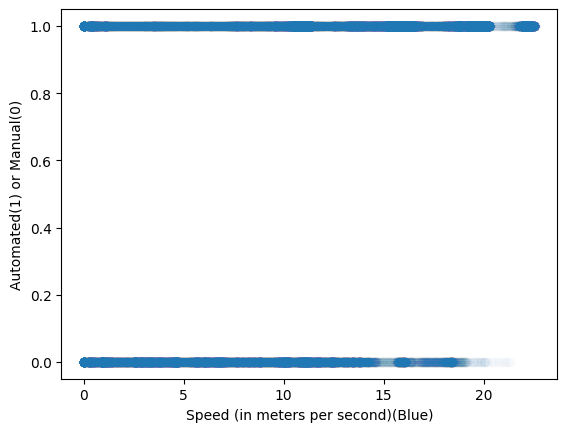

In [672]:
for df in aPositionBlue[0:1]:
    plt.scatter(df["speedMps"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Speed (in meters per second)(Blue)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()
    

In [673]:
avg_speedsBluez = []
avg_speedsBlueo = []
for df in aPositionBlue[0:]:
    avg_speedze = np.mean(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.mean(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsBluez.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsBlueo.append(avg_speedon) 
avg_sz = np.array(avg_speedsBluez)
avg_so = np.array(avg_speedsBlueo)
print(np.mean(avg_sz))
print(np.mean(avg_so))

8.002317937580452
13.362346970464646


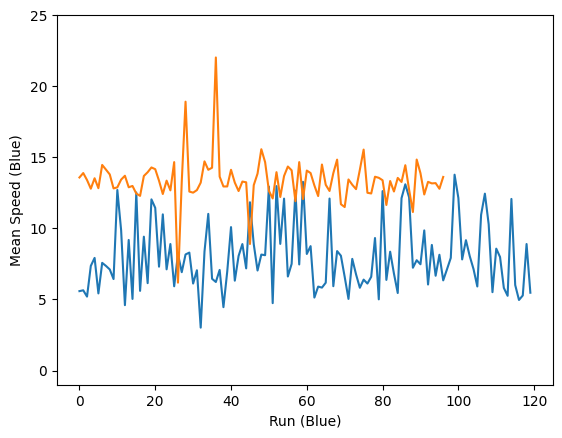

In [674]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Blue)")
plt.ylabel("Mean Speed (Blue)")
plt.ylim(-1,25)
plt.show()

In [675]:
avg_speedsBluez = []
avg_speedsBlueo = []
for df in aPositionBlue[0:]:
    avg_speedze = np.median(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.median(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsBluez.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsBlueo.append(avg_speedon) 
avg_sz = np.array(avg_speedsBluez)
avg_so = np.array(avg_speedsBlueo)
print(np.median(avg_sz))
print(np.median(avg_so))

/home/ddrobnjak_linux/do-env/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/ddrobnjak_linux/do-env/lib/python3.10/site-packages/numpy/_core/_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


7.421877
15.5


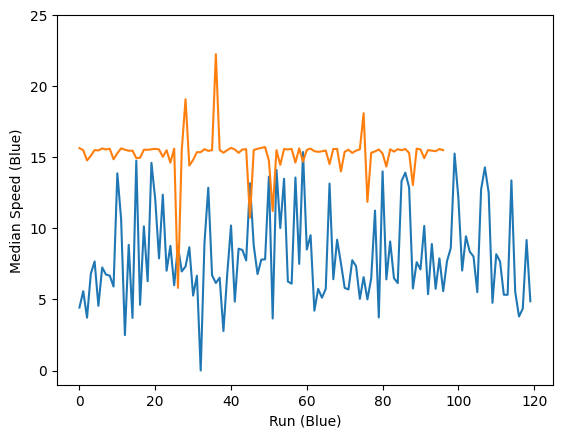

In [676]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Blue)")
plt.ylabel("Median Speed (Blue)")
plt.ylim(-1,25)
plt.show()

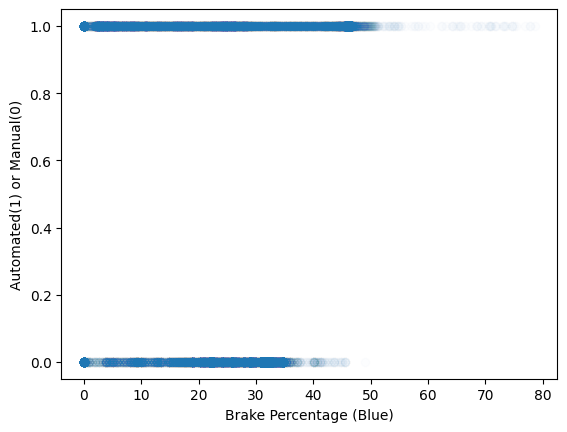

In [677]:
for df in aPositionBlue[0:1]:
    plt.scatter(df["brakePercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Brake Percentage (Blue)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()
    

In [678]:
avg_brakeBluez= []
avg_brakeBlueo= []
for df in aPositionBlue[0:]:
    avg_brakeze = np.mean(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.mean(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeBluez.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeBlueo.append(avg_brakeon)
avg_bz = np.array(avg_brakeBluez)
avg_bo = np.array(avg_brakeBlueo)
print(np.mean(avg_bz))
print(np.mean(avg_bo))

7.5242133046749355
6.2597788641212055


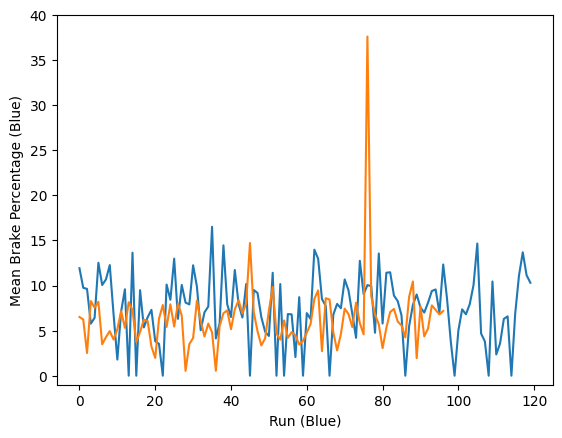

In [679]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Blue)")
plt.ylabel("Mean Brake Percentage (Blue)")
plt.ylim(-1,40)
plt.show()

In [680]:
avg_brakeBluez= []
avg_brakeBlueo= []
for df in aPositionBlue[0:]:
    avg_brakeze = np.median(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.median(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeBluez.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeBlueo.append(avg_brakeon)
avg_bz = np.array(avg_brakeBluez)
avg_bo = np.array(avg_brakeBlueo)
print(np.median(avg_bz))
print(np.median(avg_bo))

0.0
0.0


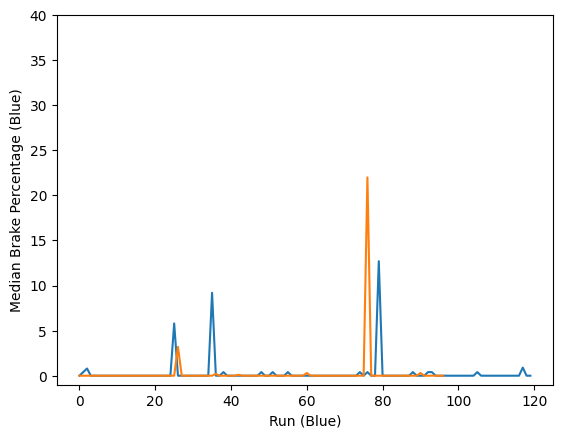

In [681]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Blue)")
plt.ylabel("Median Brake Percentage (Blue)")
plt.ylim(-1,40)
plt.show()

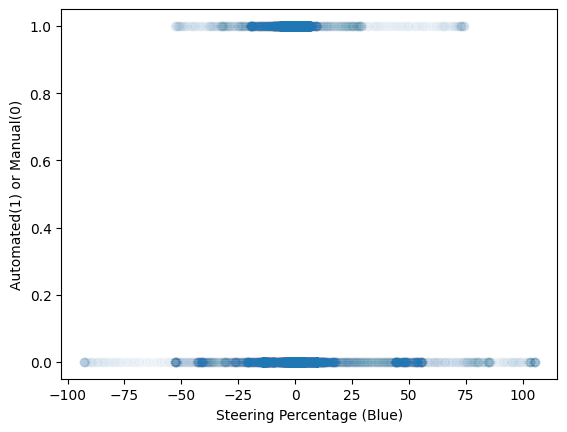

In [682]:
for df in aPositionBlue[0:1]:
    plt.scatter(df["steeringPercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Steering Percentage (Blue)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()
    

In [683]:
avg_steerBluez= []
avg_steerBlueo= []
for df in aPositionBlue[0:]:
    avg_steerze = np.mean(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.mean(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerBluez.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerBlueo.append(avg_steeron)
avg_stz = np.array(avg_steerBluez)
avg_sto = np.array(avg_steerBlueo)
print(np.mean(avg_stz))
print(np.mean(avg_sto))

0.9634391160246516
0.054098163856852136


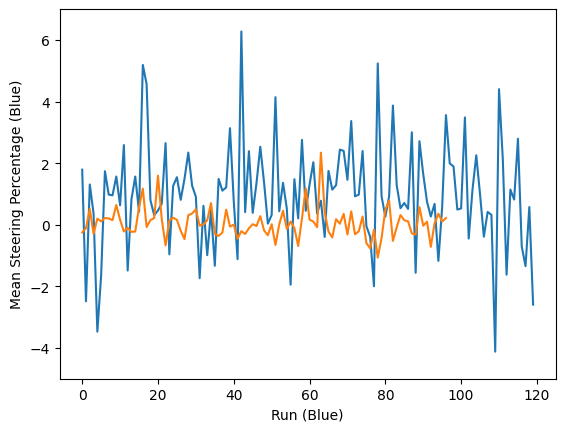

In [684]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Blue)")
plt.ylabel("Mean Steering Percentage (Blue)")
plt.ylim(-5,7)
plt.show()

In [685]:
avg_steerBluez= []
avg_steerBlueo= []
for df in aPositionBlue[0:]:
    avg_steerze = np.median(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.median(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerBluez.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerBlueo.append(avg_steeron)
avg_stz = np.array(avg_steerBluez)
avg_sto = np.array(avg_steerBlueo)
print(np.median(avg_stz))
print(np.median(avg_sto))

0.0
-0.029382957


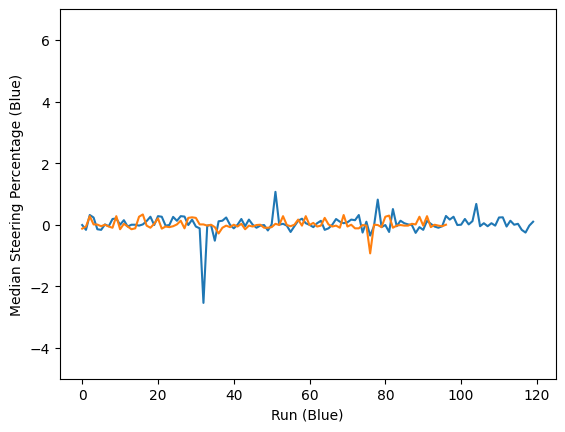

In [686]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Blue)")
plt.ylabel("Median Steering Percentage (Blue)")
plt.ylim(-5,7)
plt.show()

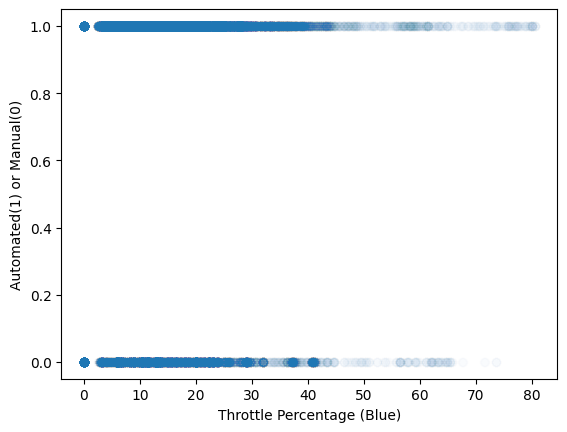

In [687]:
for df in aPositionBlue[0:1]:
    plt.scatter(df["throttlePercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Throttle Percentage (Blue)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()
    

In [688]:
avg_throttleBluez= []
avg_throttleBlueo= []
for df in aPositionBlue[0:]:
    avg_throttleze = np.mean(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon= np.mean(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleBluez.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleBlueo.append(avg_throttleon)
avg_thz = np.array(avg_throttleBluez)
avg_tho = np.array(avg_throttleBlueo)
print(np.mean(avg_thz))
print(np.mean(avg_tho))

6.007117478369313
10.696643354085083


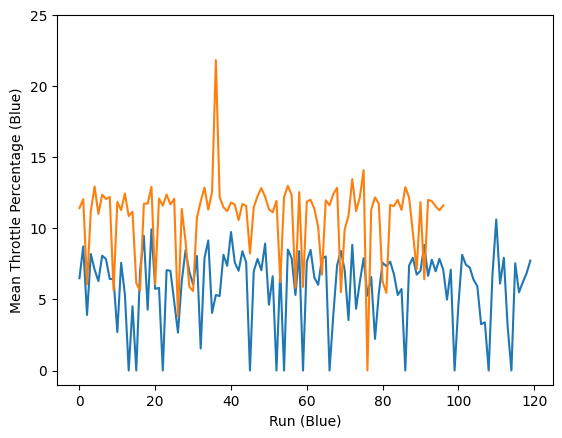

In [689]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Blue)")
plt.ylabel("Mean Throttle Percentage (Blue)")
plt.ylim(-1,25)
plt.show()

In [690]:
avg_throttleBluez= []
avg_throttleBlueo= []
for df in aPositionBlue[0:]:
    avg_throttleze = np.median(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon= np.median(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleBluez.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleBlueo.append(avg_throttleon)
avg_thz = np.array(avg_throttleBluez)
avg_tho = np.array(avg_throttleBlueo)
print(np.median(avg_thz))
print(np.median(avg_tho))

0.0
10.1


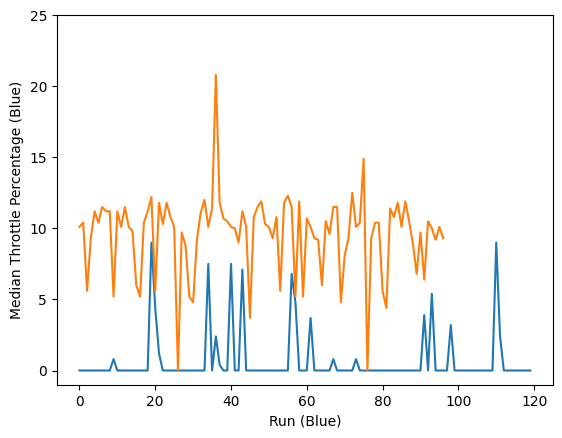

In [691]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Blue)")
plt.ylabel("Median Throttle Percentage (Blue)")
plt.ylim(-1,25)
plt.show()

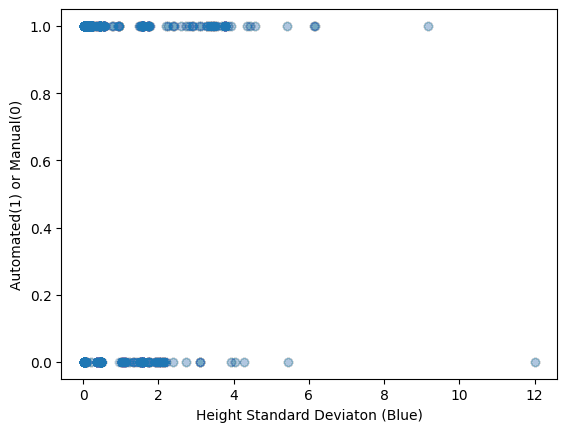

In [692]:
for df in aPositionBlue[0:1]:
    plt.scatter(df["heightStdDev"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Height Standard Deviaton (Blue)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [693]:
avg_heightBluez= []
avg_heightBlueo= []
for df in aPositionBlue[0:]:
    avg_heightze = np.mean(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.mean(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightBluez.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightBlueo.append(avg_heighton)
avg_htz = np.array(avg_heightBluez)
avg_hto = np.array(avg_heightBlueo)
print(np.mean(avg_htz))
print(np.mean(avg_hto))

0.29280356479358693
0.23035025749493998


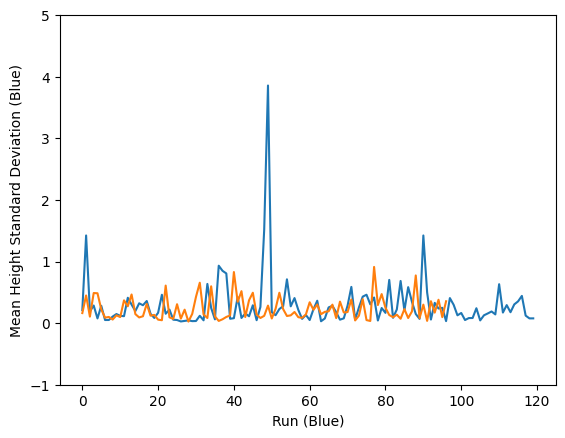

In [694]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Blue)")
plt.ylabel("Mean Height Standard Deviation (Blue)")
plt.ylim(-1,5)
plt.show()

In [695]:
avg_heightBluez= []
avg_heightBlueo= []
for df in aPositionBlue[0:]:
    avg_heightze = np.median(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.median(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightBluez.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightBlueo.append(avg_heighton)
avg_htz = np.array(avg_heightBluez)
avg_hto = np.array(avg_heightBlueo)
print(np.median(avg_htz))
print(np.median(avg_hto))

0.0316905715
0.03297143


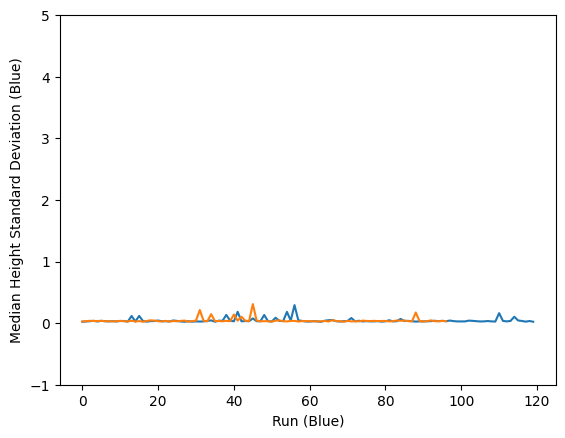

In [696]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Blue)")
plt.ylabel("Median Height Standard Deviation (Blue)")
plt.ylim(-1,5)
plt.show()

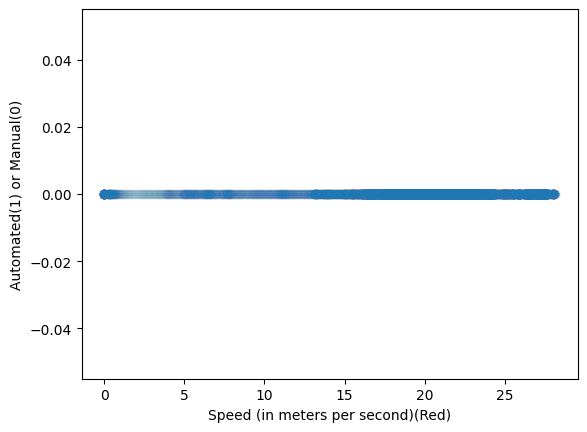

In [697]:
for df in aPositionRed[0:1]:
    plt.scatter(df["speedMps"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Speed (in meters per second)(Red)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [698]:
avg_speedsRedz= []
avg_speedsRedo= []
for df in aPositionRed[0:]:
    avg_speedze = np.mean(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.mean(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsRedz.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsRedo.append(avg_speedon) 
avg_sz = np.array(avg_speedsRedz)
avg_so = np.array(avg_speedsRedo)
print(np.mean(avg_sz))
print(np.mean(avg_so))

17.904485973100545
18.56183831373655


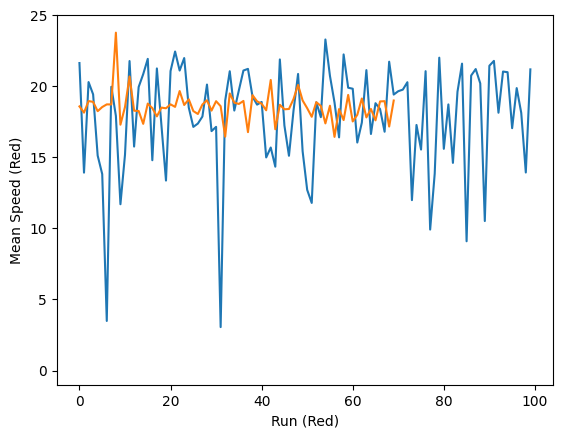

In [699]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Red)")
plt.ylabel("Mean Speed (Red)")
plt.ylim(-1,25)
plt.show()

In [700]:
avg_speedsRedz= []
avg_speedsRedo= []
for df in aPositionRed[0:]:
    avg_speedze = np.median(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.median(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsRedz.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsRedo.append(avg_speedon) 
avg_sz = np.array(avg_speedsRedz)
avg_so = np.array(avg_speedsRedo)
print(np.median(avg_sz))
print(np.median(avg_so))

19.625
18.115000000000002


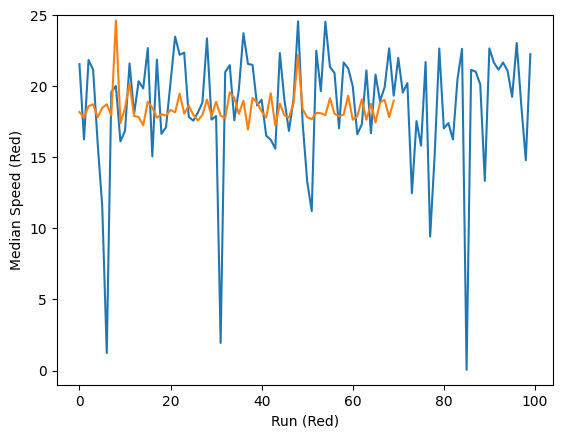

In [701]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Red)")
plt.ylabel("Median Speed (Red)")
plt.ylim(-1,25)
plt.show()

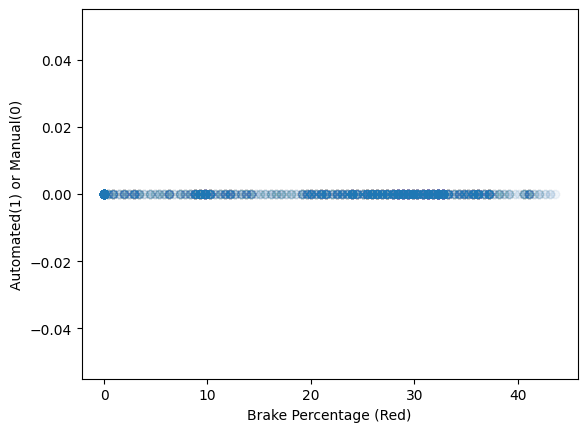

In [702]:
for df in aPositionRed[0:1]:
    plt.scatter(df["brakePercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Brake Percentage (Red)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [703]:
avg_brakeRedz= []
avg_brakeRedo= []
for df in aPositionRed[0:]:
    avg_brakeze = np.mean(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.mean(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeRedz.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeRedo.append(avg_brakeon)
avg_bz = np.array(avg_brakeRedz)
avg_bo = np.array(avg_brakeRedo)
print(np.mean(avg_bz))
print(np.mean(avg_bo))

3.062721266203685
3.535901327804286


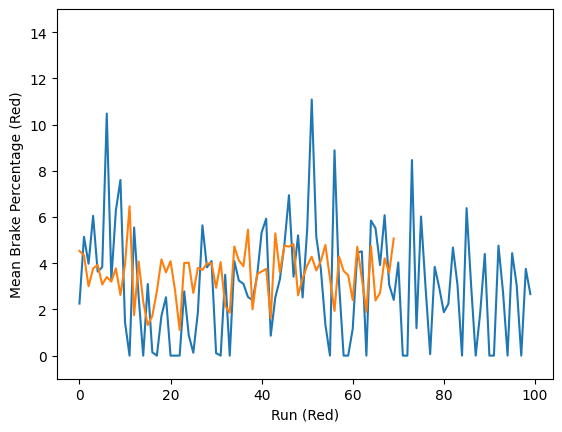

In [704]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Red)")
plt.ylabel("Mean Brake Percentage (Red)")
plt.ylim(-1,15)
plt.show()

In [705]:
avg_brakeRedz= []
avg_brakeRedo= []
for df in aPositionRed[0:]:
    avg_brakeze = np.median(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.median(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeRedz.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeRedo.append(avg_brakeon)
avg_bz = np.array(avg_brakeRedz)
avg_bo = np.array(avg_brakeRedo)
print(np.median(avg_bz))
print(np.median(avg_bo))

0.0
0.0


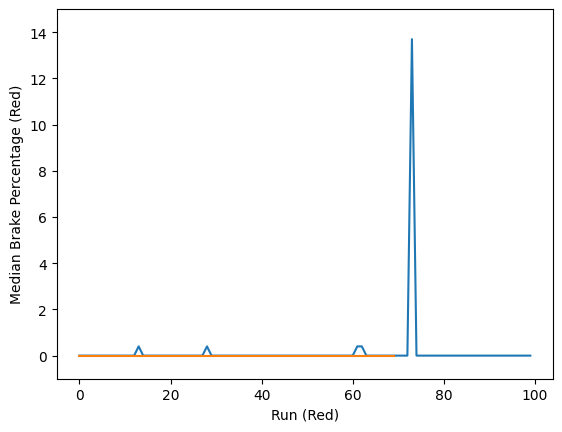

In [706]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Red)")
plt.ylabel("Median Brake Percentage (Red)")
plt.ylim(-1,15)
plt.show()

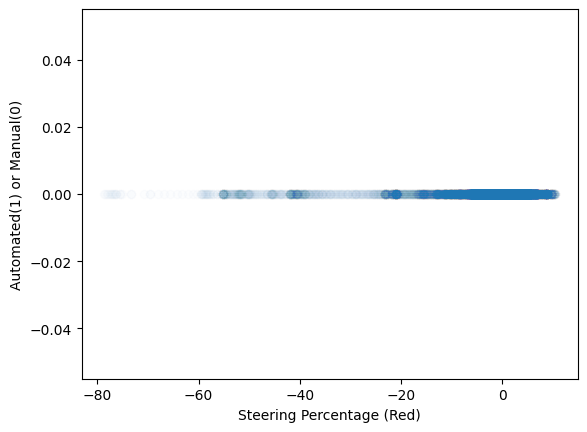

In [707]:
for df in aPositionRed[0:1]:
    plt.scatter(df["steeringPercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Steering Percentage (Red)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [708]:
avg_steerRedz= []
avg_steerRedo= []
for df in aPositionRed[0:]:
    avg_steerze = np.mean(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.mean(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerRedz.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerRedo.append(avg_steeron)
avg_stz = np.array(avg_steerRedz)
avg_sto = np.array(avg_steerRedo)
print(np.mean(avg_stz))
print(np.mean(avg_sto))

-2.1350066095897673
-0.5752694476353845


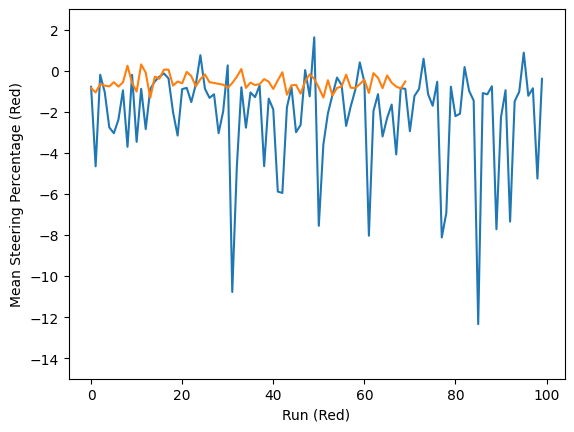

In [709]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Red)")
plt.ylabel("Mean Steering Percentage (Red)")
plt.ylim(-15,3)
plt.show()

In [710]:
avg_steerRedz= []
avg_steerRedo= []
for df in aPositionRed[0:]:
    avg_steerze = np.median(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.median(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerRedz.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerRedo.append(avg_steeron)
avg_stz = np.array(avg_steerRedz)
avg_sto = np.array(avg_steerRedo)
print(np.median(avg_stz))
print(np.median(avg_sto))

-0.048971597
-0.009794319


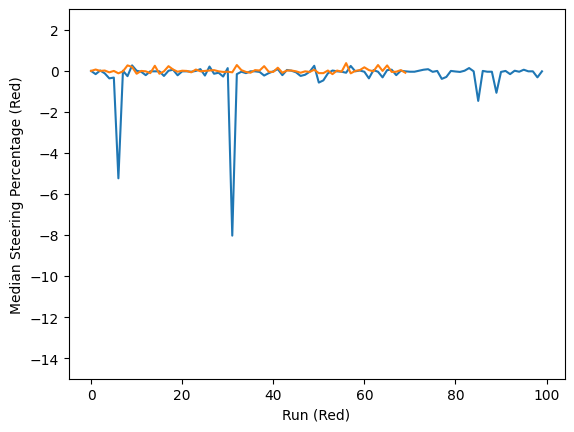

In [711]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Red)")
plt.ylabel("Median Steering Percentage (Red)")
plt.ylim(-15,3)
plt.show()

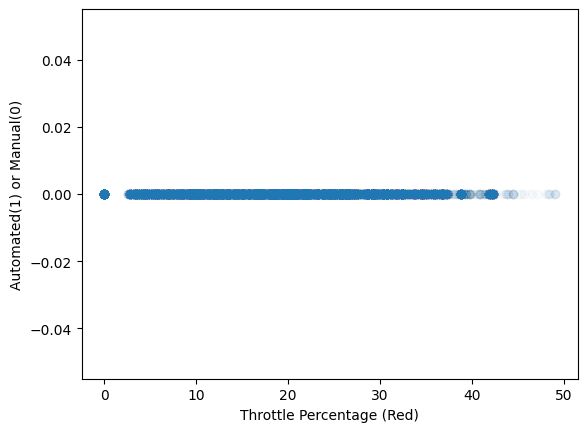

In [712]:
for df in aPositionRed[0:1]:
    plt.scatter(df["throttlePercentage"], df["BinaryDrivingMode"] , alpha = .01)
    plt.xlabel("Throttle Percentage (Red)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [747]:
avg_throttleRedz= []
avg_throttleRedo= []
for df in aPositionRed[0:]:
    avg_throttleze = np.mean(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon = np.mean(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleRedz.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleRedo.append(avg_throttleon)
avg_thz = np.array(avg_throttleRedz)
avg_tho = np.array(avg_throttleRedo)
print(np.mean(avg_thz))
print(np.mean(avg_tho))

9.802568423715986
14.348914160187904


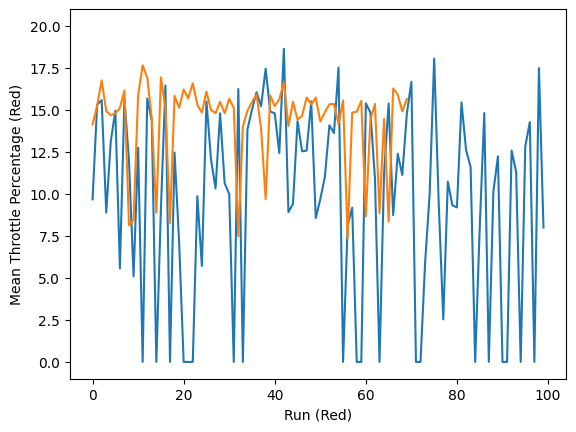

In [748]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Red)")
plt.ylabel("Mean Throttle Percentage (Red)")
plt.ylim(-1,21)
plt.show()

In [749]:
avg_throttleRedz= []
avg_throttleRedo= []
for df in aPositionRed[0:]:
    avg_throttleze = np.median(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon = np.median(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleRedz.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleRedo.append(avg_throttleon)
avg_thz = np.array(avg_throttleRedz)
avg_tho = np.array(avg_throttleRedo)
print(np.median(avg_thz))
print(np.median(avg_tho))

2.0
14.5


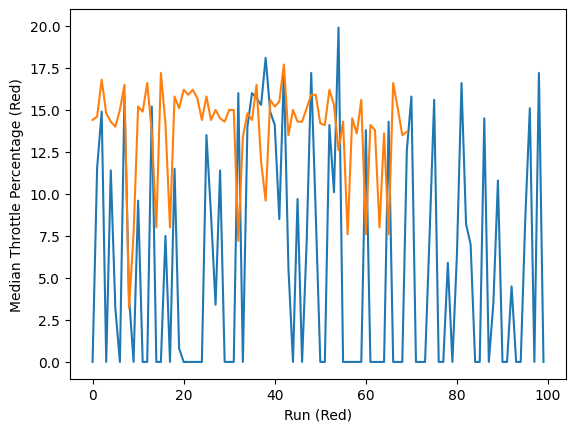

In [750]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Red)")
plt.ylabel("Median Throttle Percentage (Red)")
plt.ylim(-1,21)
plt.show()

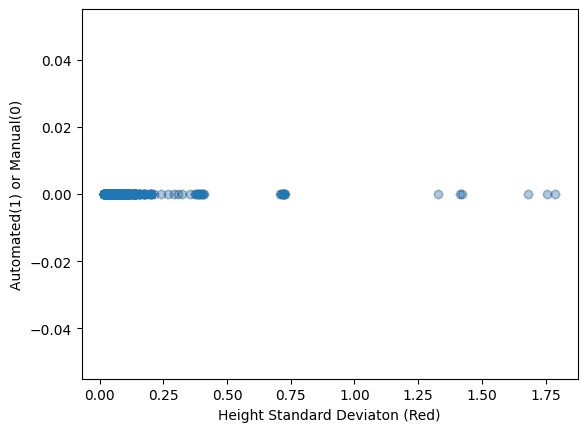

In [717]:
for df in aPositionRed[0:1]:
    plt.scatter(df["heightStdDev"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Height Standard Deviaton (Red)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [753]:
avg_heightRedz= []
avg_heightRedo= []
for df in aPositionRed[0:]:
    avg_heightze = np.mean(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.mean(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightRedz.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightRedo.append(avg_heighton) 
avg_htz = np.array(avg_heightRedz)
avg_hto = np.array(avg_heightRedo)
print(np.mean(avg_htz))
print(np.mean(avg_hto))

1.6901758705474759
0.5577961281874072


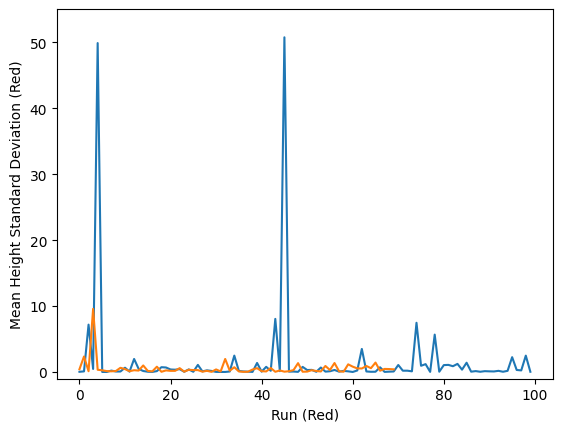

In [754]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Red)")
plt.ylabel("Mean Height Standard Deviation (Red)")
plt.ylim(-1,55)
plt.show()

In [755]:
avg_heightRedz= []
avg_heightRedo= []
for df in aPositionRed[0:]:
    avg_heightze = np.median(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.median(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightRedz.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightRedo.append(avg_heighton) 
avg_htz = np.array(avg_heightRedz)
avg_hto = np.array(avg_heightRedo)
print(np.median(avg_htz))
print(np.median(avg_hto))

0.0330051685
0.040878406


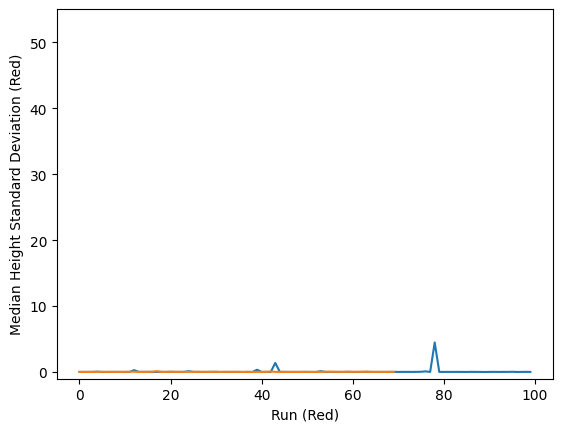

In [756]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Red)")
plt.ylabel("Median Height Standard Deviation (Red)")
plt.ylim(-1,55)
plt.show()

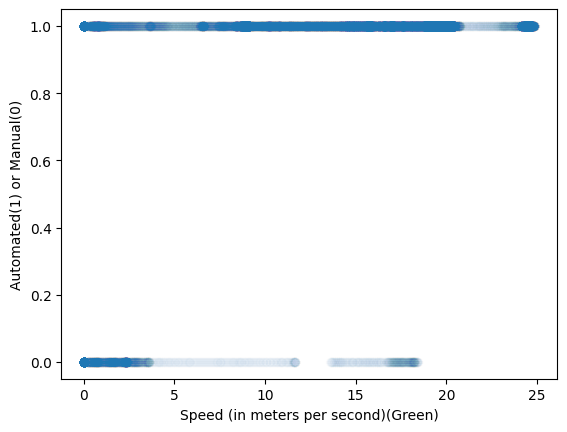

In [722]:
for df in aPositionGreen[0:1]:
    plt.scatter(df["speedMps"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Speed (in meters per second)(Green)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [757]:
avg_speedsGreenz= []
avg_speedsGreeno= []
for df in aPositionGreen[0:]:
    avg_speedze = np.mean(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.mean(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsGreenz.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsGreeno.append(avg_speedon) 
avg_sz = np.array(avg_speedsGreenz)
avg_so = np.array(avg_speedsGreeno)
print(np.mean(avg_sz))
print(np.mean(avg_so))

10.8520237435096
16.997383347789594


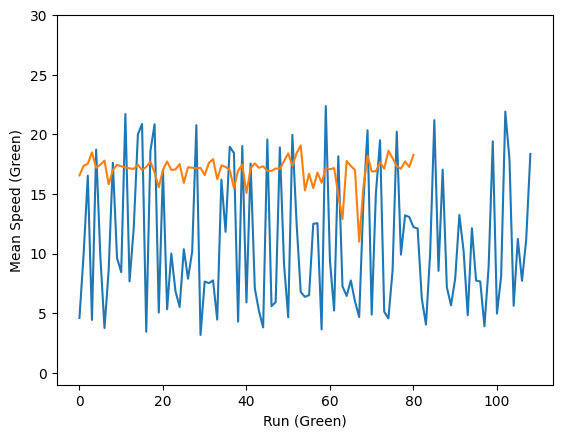

In [758]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Green)")
plt.ylabel("Mean Speed (Green)")
plt.ylim(-1,30)
plt.show()

In [759]:
avg_speedsGreenz= []
avg_speedsGreeno= []
for df in aPositionGreen[0:]:
    avg_speedze = np.median(df[df["BinaryDrivingMode"] == 0]["speedMps"])
    avg_speedon= np.median(df[df["BinaryDrivingMode"] == 1]["speedMps"])
    if np.isnan(avg_speedze) != True:
        avg_speedsGreenz.append(avg_speedze)
    if np.isnan(avg_speedon) != True:
        avg_speedsGreeno.append(avg_speedon) 
avg_sz = np.array(avg_speedsGreenz)
avg_so = np.array(avg_speedsGreeno)
print(np.median(avg_sz))
print(np.median(avg_so))

10.138894
19.24


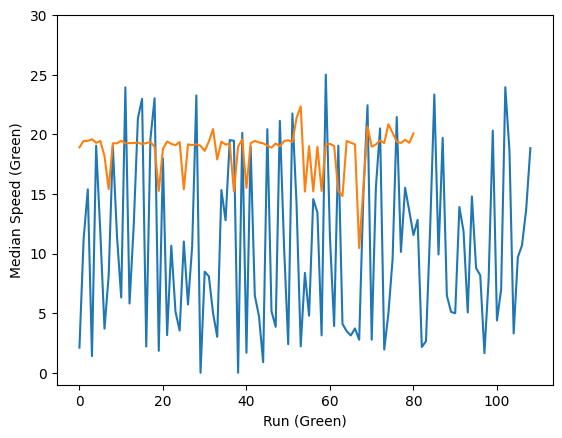

In [760]:
plt.plot(avg_sz)
plt.plot(avg_so)
plt.xlabel("Run (Green)")
plt.ylabel("Median Speed (Green)")
plt.ylim(-1,30)
plt.show()

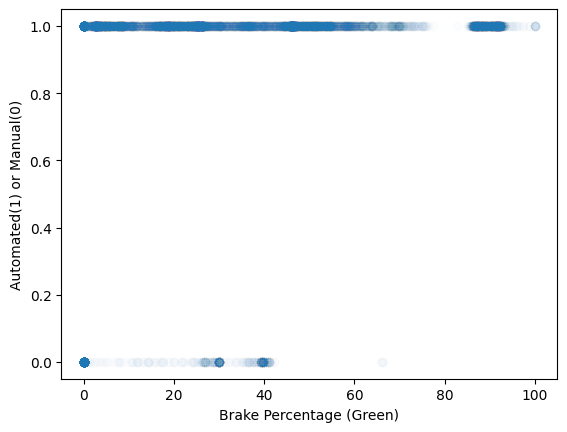

In [727]:
for df in aPositionGreen[0:1]:
    plt.scatter(df["brakePercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Brake Percentage (Green)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [728]:
avg_brakeGreenz= []
avg_brakeGreeno= []
for df in aPositionGreen[0:]:
    avg_brakeze = np.mean(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.mean(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeGreenz.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeGreeno.append(avg_brakeon)
avg_bz = np.array(avg_brakeGreenz)
avg_bo = np.array(avg_brakeGreeno)
print(np.mean(avg_bz))
print(np.mean(avg_bo))

3.3749189944230165
5.786203487773911


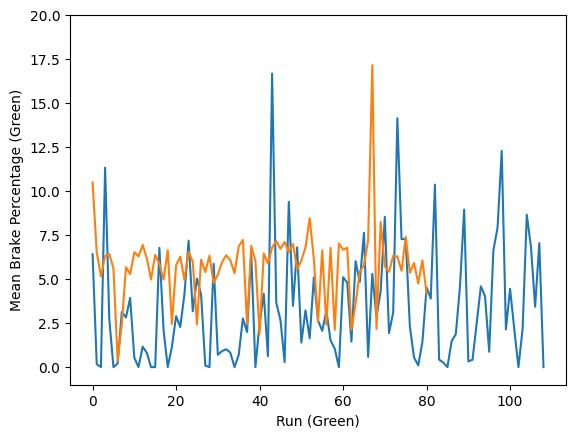

In [729]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Green)")
plt.ylabel("Mean Brake Percentage (Green)")
plt.ylim(-1,20)
plt.show()

In [730]:
avg_brakeGreenz= []
avg_brakeGreeno= []
for df in aPositionGreen[0:]:
    avg_brakeze = np.median(df[df["BinaryDrivingMode"] == 0]["brakePercentage"])
    avg_brakeon= np.median(df[df["BinaryDrivingMode"] == 1]["brakePercentage"])
    if np.isnan(avg_brakeze) != True:
        avg_brakeGreenz.append(avg_brakeze)
    if np.isnan(avg_brakeon) != True:
        avg_brakeGreeno.append(avg_brakeon)
avg_bz = np.array(avg_brakeGreenz)
avg_bo = np.array(avg_brakeGreeno)
print(np.median(avg_bz))
print(np.median(avg_bo))

0.0
0.0


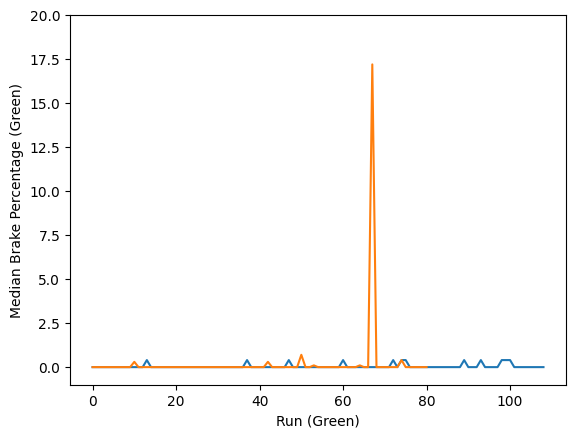

In [731]:
plt.plot(avg_bz)
plt.plot(avg_bo)
plt.xlabel("Run (Green)")
plt.ylabel("Median Brake Percentage (Green)")
plt.ylim(-1,20)
plt.show()

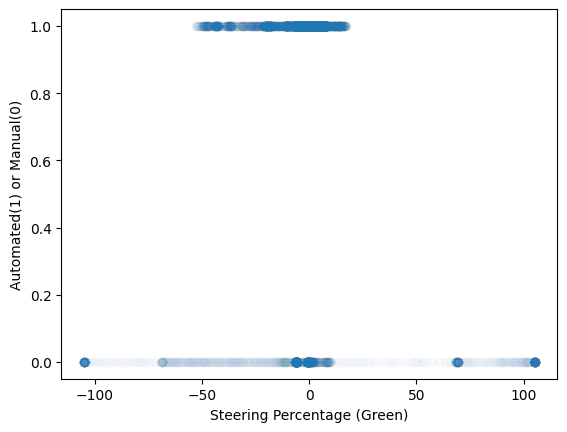

In [732]:
for df in aPositionGreen[0:1]:
    plt.scatter(df["steeringPercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Steering Percentage (Green)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [761]:
avg_steerGreenz= []
avg_steerGreeno= []
for df in aPositionGreen[0:]:
    avg_steerze = np.mean(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.mean(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerGreenz.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerGreeno.append(avg_steeron)
avg_stz = np.array(avg_steerGreenz)
avg_sto = np.array(avg_steerGreeno)
print(np.mean(avg_stz))
print(np.mean(avg_sto))

-5.022023601328714
-1.6104878261247506


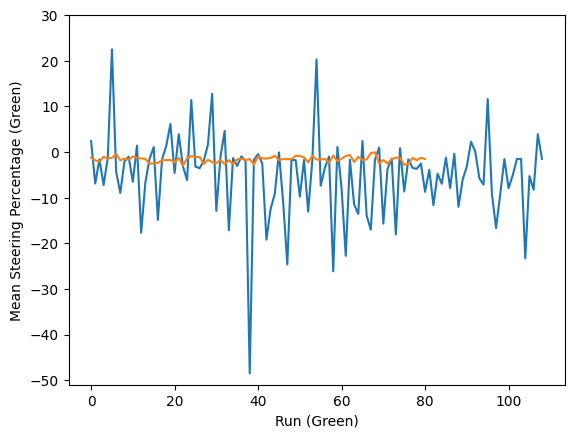

In [762]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Green)")
plt.ylabel("Mean Steering Percentage (Green)")
plt.ylim(-51,30)
plt.show()

In [763]:
avg_steerGreenz= []
avg_steerGreeno= []
for df in aPositionGreen[0:]:
    avg_steerze = np.median(df[df["BinaryDrivingMode"] == 0]["steeringPercentage"])
    avg_steeron= np.median(df[df["BinaryDrivingMode"] == 1]["steeringPercentage"])
    if np.isnan(avg_steerze) != True:
        avg_steerGreenz.append(avg_steerze)
    if np.isnan(avg_steeron) != True:
        avg_steerGreeno.append(avg_steeron)
avg_stz = np.array(avg_steerGreenz)
avg_sto = np.array(avg_steerGreeno)
print(np.median(avg_stz))
print(np.median(avg_sto))

-0.24485798
-0.009794319


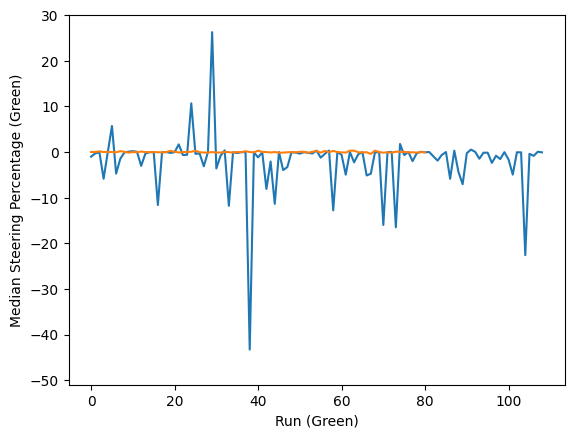

In [764]:
plt.plot(avg_stz)
plt.plot(avg_sto)
plt.xlabel("Run (Green)")
plt.ylabel("Median Steering Percentage (Green)")
plt.ylim(-51,30)
plt.show()

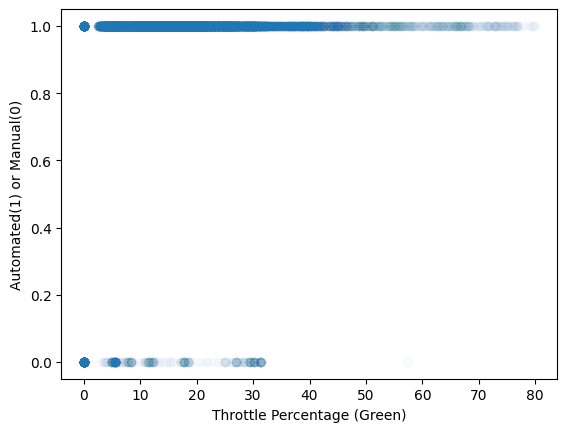

In [737]:
for df in aPositionGreen[0:1]:
    plt.scatter(df["throttlePercentage"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Throttle Percentage (Green)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [738]:
avg_throttleGreenz= []
avg_throttleGreeno= []
for df in aPositionGreen[0:]:
    avg_throttleze = np.mean(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon= np.mean(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleGreenz.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleGreeno.append(avg_throttleon)
avg_thz = np.array(avg_throttleGreenz)
avg_tho = np.array(avg_throttleGreeno)
print(np.mean(avg_thz))
print(np.mean(avg_tho))

7.206477209428804
14.421003689103763


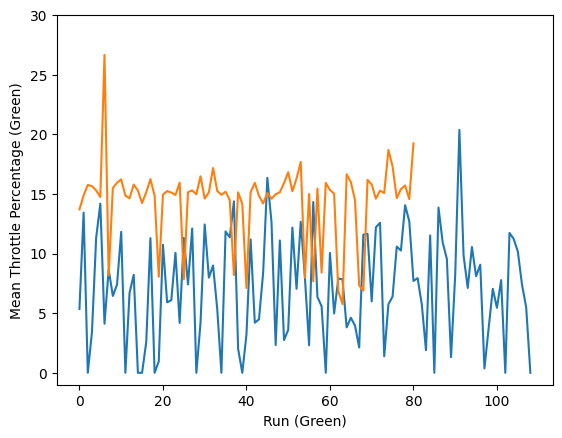

In [739]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Green)")
plt.ylabel("Mean Throttle Percentage (Green)")
plt.ylim(-1,30)
plt.show()

In [740]:
avg_throttleGreenz= []
avg_throttleGreeno= []
for df in aPositionGreen[0:]:
    avg_throttleze = np.median(df[df["BinaryDrivingMode"] == 0]["throttlePercentage"])
    avg_throttleon= np.median(df[df["BinaryDrivingMode"] == 1]["throttlePercentage"])
    if np.isnan(avg_throttleze) != True:
        avg_throttleGreenz.append(avg_throttleze)
    if np.isnan(avg_throttleon) != True:
        avg_throttleGreeno.append(avg_throttleon)
avg_thz = np.array(avg_throttleGreenz)
avg_tho = np.array(avg_throttleGreeno)
print(np.median(avg_thz))
print(np.median(avg_tho))

0.0
14.2


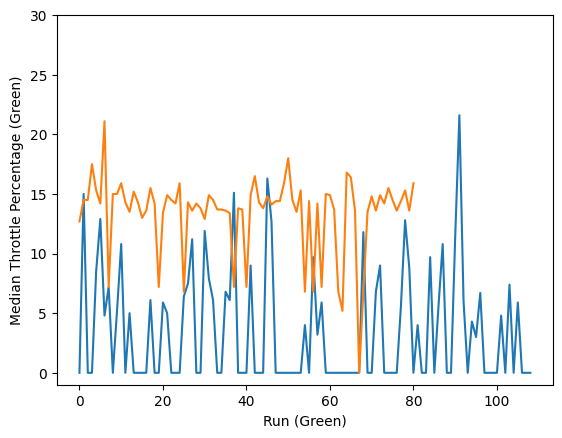

In [741]:
plt.plot(avg_thz)
plt.plot(avg_tho)
plt.xlabel("Run (Green)")
plt.ylabel("Median Throttle Percentage (Green)")
plt.ylim(-1,30)
plt.show()

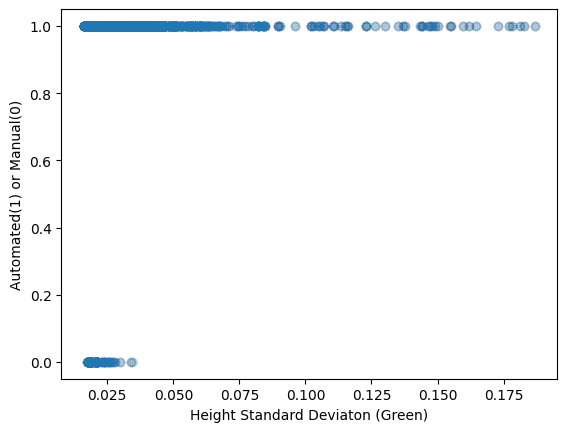

In [742]:
for df in aPositionGreen[0:1]:
    plt.scatter(df["heightStdDev"], df["BinaryDrivingMode"], alpha = .01)
    plt.xlabel("Height Standard Deviaton (Green)")
    plt.ylabel("Automated(1) or Manual(0)")
    plt.show()

In [743]:
avg_heightGreenz= []
avg_heightGreeno= []
for df in aPositionGreen[0:]:
    avg_heightze = np.mean(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.mean(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightGreenz.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightGreeno.append(avg_heighton) 
avg_htz = np.array(avg_heightGreenz)
avg_hto = np.array(avg_heightGreeno)
print(np.mean(avg_htz))
print(np.mean(avg_hto))

0.699040047909618
0.3217919491370034


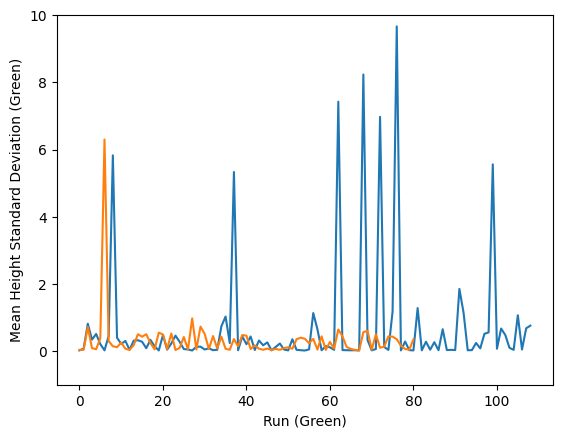

In [744]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Green)")
plt.ylabel("Mean Height Standard Deviation (Green)")
plt.ylim(-1,10)
plt.show()

In [745]:
avg_heightGreenz= []
avg_heightGreeno= []
for df in aPositionGreen[0:]:
    avg_heightze = np.median(df[df["BinaryDrivingMode"] == 0]["heightStdDev"])
    avg_heighton= np.median(df[df["BinaryDrivingMode"] == 1]["heightStdDev"])
    if np.isnan(avg_heightze) != True:
        avg_heightGreenz.append(avg_heightze)
    if np.isnan(avg_heighton) != True:
        avg_heightGreeno.append(avg_heighton) 
avg_htz = np.array(avg_heightGreenz)
avg_hto = np.array(avg_heightGreeno)
print(np.median(avg_htz))
print(np.median(avg_hto))

0.029289521
0.03135051


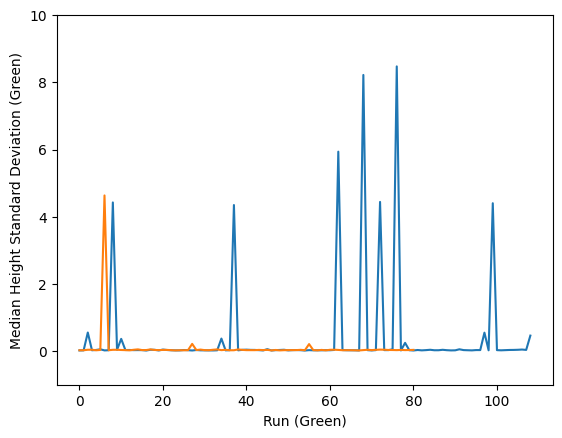

In [746]:
plt.plot(avg_htz)
plt.plot(avg_hto)
plt.xlabel("Run (Green)")
plt.ylabel("Median Height Standard Deviation (Green)")
plt.ylim(-1,10)
plt.show()